In [2]:
#HACER EL ANALISIS DE CALIDAD DE DATOS INDIVIDUALMENTE TABLA POR TABLA, PARA UNA MEJOR GESTION
#IMPORTACION DE LOS DATOS

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy = True

In [90]:
con = sa.create_engine('sqlite:///../DATOS/airbnb2.db')

In [91]:
#Mostramos que tablas contiene nuestra bd, mediante la funcion inspect
from sqlalchemy import inspect

inspect = inspect(con) #inespector sobre esta base de datos
tablas = inspect.get_table_names()
tablas

['listings', 'listings_det']

In [92]:
listings = pd.read_sql('listings',con)
listings_det = pd.read_sql('listings_det',con)

In [7]:
#importacion dinamica para varias tablas, con exec
for tabla in tablas:
    exec(f'{tabla} = pd.read_sql(tabla,con)')

In [8]:
#comprobacion si las tablas se han cargado correctamente
for cada in tablas:
    print(cada + ":" + str(eval(cada).shape))

listings:(18909, 19)
listings_det:(18909, 75)


In [93]:
#Datos obtenidos de idealista con WebScrapper
precio_m2 = pd.read_csv('../DATOS/idealista.csv') \
            .loc[1:,['table__cell','icon-elbow']] \
            .rename(columns = {'table__cell':'precio_m2','icon-elbow':'distrito'})
precio_m2

,precio_m2,distrito
1,4.282 €/m2,Arganzuela
2,3.255 €/m2,Barajas
3,2.278 €/m2,Carabanchel
4,5.171 €/m2,Centro
5,5.534 €/m2,Chamartín
6,5.706 €/m2,Chamberí
7,3.167 €/m2,Ciudad Lineal
8,3.718 €/m2,Fuencarral
9,4.003 €/m2,Hortaleza
10,2.404 €/m2,Latina


In [94]:
#object tipo texto, vamos a utilizar el accessor str, para poder aplicar distintos metodos y limpiar este df
precio_m2['precio_m2'] = precio_m2.precio_m2.str.split(expand=True)[0].str.replace('.','',regex=False).astype('int')


In [54]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int32 
 1   distrito   21 non-null     object
dtypes: int32(1), object(1)
memory usage: 384.0+ bytes


In [55]:
#Analisis calidad de datos tabla listings
listings.head()


,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,80,2019-05-14,1.21,2,180,4,None
1,1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.39,2,364,0,None
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,None,NaN,5,222,0,None
3,3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,None
4,4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2018-05-15,1.65,1,349,0,None


In [56]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           18909 non-null  int64  
 1   id                              18909 non-null  int64  
 2   name                            18906 non-null  object 
 3   host_id                         18909 non-null  int64  
 4   host_name                       18883 non-null  object 
 5   neighbourhood_group             18909 non-null  object 
 6   neighbourhood                   18909 non-null  object 
 7   latitude                        18909 non-null  float64
 8   longitude                       18909 non-null  float64
 9   room_type                       18909 non-null  object 
 10  price                           18909 non-null  int64  
 11  minimum_nights                  18909 non-null  int64  
 12  number_of_reviews               

In [95]:
a_eliminar= [
            'index',
            'host_id',
            'number_of_reviews',
            'last_review',
            'reviews_per_month',
            'number_of_reviews_ltm',
            'license']
listings.drop(columns=a_eliminar,inplace=True)

In [15]:
#Inspeccionar tipos de variables y cambiar tipos
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_name                       18883 non-null  object 
 3   neighbourhood_group             18909 non-null  object 
 4   neighbourhood                   18909 non-null  object 
 5   latitude                        18909 non-null  float64
 6   longitude                       18909 non-null  float64
 7   room_type                       18909 non-null  object 
 8   price                           18909 non-null  int64  
 9   minimum_nights                  18909 non-null  int64  
 10  calculated_host_listings_count  18909 non-null  int64  
 11  availability_365                18909 non-null  int64  
dtypes: float64(2), int64(5), object(

In [96]:
for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype('category')

In [97]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_name                       18883 non-null  object  
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

In [98]:
#Analisis de nulos, este es el unico campo de nulos, pero lo vamos a dejar asi, no es algo relevante
listings[listings.name.isna()]

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1538,7164589,None,Marta,Centro,Palacio,40.41458,-3.71422,Private room,30,1,1,0
2394,11687495,None,Anna Laura,San Blas - Canillejas,Simancas,40.43765,-3.62672,Entire home/apt,50,1,1,0
2842,13585476,None,Marta,Centro,Universidad,40.42718,-3.71144,Entire home/apt,65,3,1,0


In [99]:
#Analisis de duplicados
listings.duplicated().sum()

0

In [100]:
#Analisis principales variables

#Analisis variables categoricas
listings.neighbourhood_group.value_counts()

Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: neighbourhood_group, dtype: int64

In [101]:
listings.neighbourhood.value_counts()

Embajadores    2255
Universidad    1772
Palacio        1533
Sol            1126
Justicia        910
               ... 
El Plantío        5
Valdemarín        4
El Pardo          3
Horcajo           2
Atalaya           1
Name: neighbourhood, Length: 128, dtype: int64

In [102]:
listings.room_type.value_counts()
#no interesan los registros que tengan hoteles, para no sesgar el resto de los analisis (tener en cuenta el objetivo principal) 

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: room_type, dtype: int64

In [103]:
listings.shape

(18909, 12)

In [104]:
#eliminar todos esos registros de los hoteles que no interesan
listings = listings.loc[listings.room_type != 'Hotel room']

In [105]:
listings.shape

(18746, 12)

In [26]:
#ANALISIS DE LAS VARIABLES CONTINUAS/NUMERICAS
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18746 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18746 non-null  int64   
 1   name                            18743 non-null  object  
 2   host_name                       18720 non-null  object  
 3   neighbourhood_group             18746 non-null  category
 4   neighbourhood                   18746 non-null  category
 5   latitude                        18746 non-null  float64 
 6   longitude                       18746 non-null  float64 
 7   room_type                       18746 non-null  category
 8   price                           18746 non-null  int64   
 9   minimum_nights                  18746 non-null  int64   
 10  calculated_host_listings_count  18746 non-null  int64   
 11  availability_365                18746 non-null  int64   
dtypes: category(3), fl

In [106]:
#Variables continuas
listings.iloc[:,8:].describe().T
#se observa una media bastante alta, debido a valores atipicos
#en este caso es mejor utilizar la media ya que es un valor mas representativo de los datos.

,count,mean,std,min,25%,50%,75%,max
price,18746.0,129.271365,432.384680,8.0,36.0,64.0,105.0,9999.0
minimum_nights,18746.0,7.295850,35.430022,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,18746.0,10.731676,26.429455,1.0,1.0,2.0,6.0,194.0
availability_365,18746.0,153.761656,140.363063,0.0,0.0,113.0,310.0,365.0


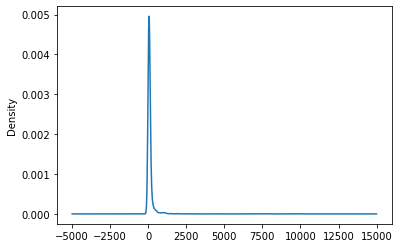

In [107]:
#Analizamos el maximo del precio ya que es un valor muy alto y debe haber algun atipico que hace que nuestra media tambien sea alta

listings.price.plot.kde();
#La gran mayoria de precio se encuentran entre ese minimo de 8 y 200.

In [108]:
listings.price.loc[listings.price > 1000].value_counts().sort_index()

1050     3
1067     1
1080     1
1100    11
1111     1
        ..
8469     1
8584     1
8930     1
9000     1
9999    12
Name: price, Length: 74, dtype: int64

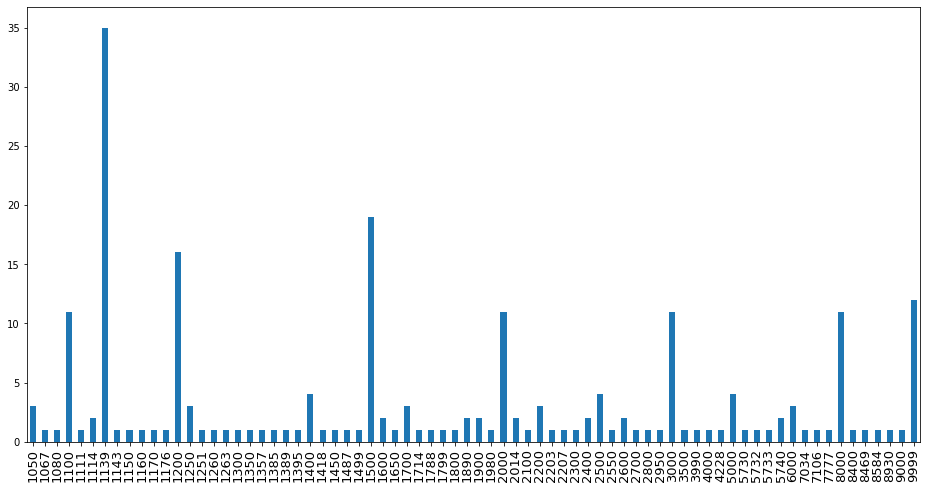

In [30]:
#filtro para ver los immuebles con precios superiores a 1000 euros
plt.figure(figsize = (16,8))
listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()
plt.xticks(size=13);

In [70]:
#miramos el precio mas alto, para ver a que se debe
listings.loc[listings.price == 9999]

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
394,1101760,GREAT ATTIC-BARRIO DE LAS LETRA,Santiago,Centro,Cortes,40.41340,-3.69730,Entire home/apt,9999,2,4,251
993,4421901,Tu Casa en el Corazon de Madrid (1er D),Trifinio,Centro,Cortes,40.41332,-3.69636,Entire home/apt,9999,1,10,1
1357,6532332,"SUNNY TERRACE, PARKING - LOCATION!",Santiago,Centro,Embajadores,40.40902,-3.69839,Entire home/apt,9999,2,4,254
3413,15645521,Wonderful Location: Atocha/Museums/Retiro,David,Arganzuela,Palos de Moguer,40.40530,-3.69149,Entire home/apt,9999,2,1,253
3769,16810981,LIFE STYLE CENTER,Doris,Arganzuela,Delicias,40.39821,-3.69490,Entire home/apt,9999,2,1,253
4349,18573644,"Romantic atic centre, Atocha, Santa Ana, Sol",Antonio,Centro,Cortes,40.41192,-3.69779,Entire home/apt,9999,2,1,253
4733,19319064,Confort Absoluto en Atocha,Ángeles Y Doris,Arganzuela,Palos de Moguer,40.40203,-3.68948,Entire home/apt,9999,2,1,253
5083,19859469,MALASAÑA EXTERIOR SOLEADO CON BALCONES-ANTI CV...,Enrique,Centro,Universidad,40.42380,-3.70322,Entire home/apt,9999,4,4,99
7648,27559425,PRADO Apartment I (2BR 2BT),Homeabout,Centro,Justicia,40.42166,-3.69795,Entire home/apt,9999,1,26,253
8337,29926762,Charming Center Penthouse - In the Center,Javier,Centro,Embajadores,40.41045,-3.70355,Entire home/apt,9999,1,1,253


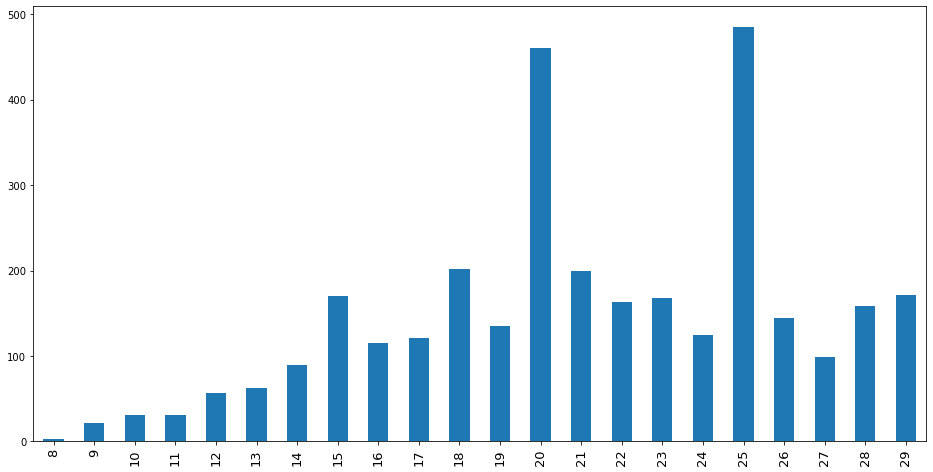

In [109]:
plt.figure(figsize = (16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size=13);
#no nos interesaria alquilar algo que por la noche valga 20 euros o menos por ejemplo, por lo tanto los decartamos

In [110]:
listings = listings.loc[listings.price > 19]
listings

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",Simon,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,21853,Bright and airy room,Abdel,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,Jesus,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,A,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,Agustina,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,Svetlana,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,Svetlana,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,Svetlana,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,Svetlana,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


In [111]:
#ANALISIS TABLA LISTINGS_DET
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         18909 non-null  int64  
 1   id                                            18909 non-null  int64  
 2   listing_url                                   18909 non-null  object 
 3   scrape_id                                     18909 non-null  int64  
 4   last_scraped                                  18909 non-null  object 
 5   name                                          18906 non-null  object 
 6   description                                   17854 non-null  object 
 7   neighborhood_overview                         10997 non-null  object 
 8   picture_url                                   18908 non-null  object 
 9   host_id                                       18909 non-null 

In [112]:
a_incluir = ['id',
             'description',
             'host_is_superhost',
             'accommodates',
             'bedrooms',
             'beds',
             'number_of_reviews',
             'review_scores_rating',
             'review_scores_communication',
             'review_scores_location']
listings_det = listings_det.loc[:,a_incluir]

In [73]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18909 non-null  int64  
 1   description                  17854 non-null  object 
 2   host_is_superhost            18883 non-null  object 
 3   accommodates                 18909 non-null  int64  
 4   bedrooms                     17475 non-null  float64
 5   beds                         18568 non-null  float64
 6   number_of_reviews            18909 non-null  int64  
 7   review_scores_rating         13877 non-null  float64
 8   review_scores_communication  13640 non-null  float64
 9   review_scores_location       13637 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 1.4+ MB


In [74]:
#ANALISIS DE TIPOS
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18909 non-null  int64  
 1   description                  17854 non-null  object 
 2   host_is_superhost            18883 non-null  object 
 3   accommodates                 18909 non-null  int64  
 4   bedrooms                     17475 non-null  float64
 5   beds                         18568 non-null  float64
 6   number_of_reviews            18909 non-null  int64  
 7   review_scores_rating         13877 non-null  float64
 8   review_scores_communication  13640 non-null  float64
 9   review_scores_location       13637 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 1.4+ MB


In [113]:
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bedrooms                     17475 non-null  float64 
 5   beds                         18568 non-null  float64 
 6   number_of_reviews            18909 non-null  int64   
 7   review_scores_rating         13877 non-null  float64 
 8   review_scores_communication  13640 non-null  float64 
 9   review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [114]:
#ANALISIS DE NULOS LISTINGS_DET
listings_det.isna().sum()

id                                0
description                    1055
host_is_superhost                26
accommodates                      0
bedrooms                       1434
beds                            341
number_of_reviews                 0
review_scores_rating           5032
review_scores_communication    5269
review_scores_location         5272
dtype: int64

In [115]:
#Hacemos una tabla cruzada entre accommodates y beds
pd.crosstab(listings_det.beds, listings_det.accommodates)
#Cual suele ser el numero de camas que se suele producir cuando el piso puede acomodar 1 persona?
#Se observa el siguiente patron
#1- 2 pers = 1 cama
#3-4 pers = 2 camas
#4-6 pers = 3 camas
#+6 pers = 4 camas

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,222,259,41,68,15,12,5,3,0,2,0,0,0,0,0,1
1.0,2765,4911,399,639,14,9,0,3,0,2,0,0,0,0,0,9
2.0,120,1110,1016,2277,125,148,3,3,0,1,0,0,1,0,0,1
3.0,18,75,231,925,395,582,18,26,1,1,0,0,0,0,0,0
4.0,20,28,32,216,214,498,73,92,3,9,0,1,0,0,0,0
5.0,2,5,6,20,42,178,75,94,9,30,2,2,0,1,0,0
6.0,14,9,2,5,7,62,21,61,9,18,4,8,2,0,0,0
7.0,0,1,0,2,2,6,10,19,8,17,2,6,1,4,0,0
8.0,3,2,0,0,3,2,0,21,3,18,2,9,2,2,1,0


In [116]:
#estimacion de los registros nulos en la variable beds (proxy)
#utilizar terceras variables para hacer esa estimacion de nº beds a partir de accommodates
def imputar_nulos(registro):
    #Lista condiciones
    condiciones = [(registro.accommodates <= 2 ),
                (registro.accommodates > 2 ) & (registro.accommodates <= 4),
                (registro.accommodates > 4) & (registro.accommodates <= 6),
                (registro.accommodates > 6)]                
    #salida
    resultado = [1,2,3,4]
    return (np.select(condiciones,resultado,default = -999))

listings_det.loc[listings_det['beds'].isna(),'beds'] = listings_det.loc[listings_det['beds'].isna()].apply(imputar_nulos,axis = 1).astype('int64') #axis=1 =le pasa el registro entero

In [117]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bedrooms                     17475 non-null  float64 
 5   beds                         18909 non-null  float64 
 6   number_of_reviews            18909 non-null  int64   
 7   review_scores_rating         13877 non-null  float64 
 8   review_scores_communication  13640 non-null  float64 
 9   review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [43]:
#estimar bedrooms a partir de accommodates
pd.crosstab(listings_det.bedrooms,listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bedrooms,,,,,,,,,,,,,,,,
1.0,3009,5569,1141,2265,111,81,4,14,0,7,0,0,0,0,0,11
2.0,74,173,348,1560,444,852,51,48,4,6,1,0,0,1,0,0
3.0,21,22,45,104,220,509,106,158,7,20,4,13,1,2,1,0
4.0,16,21,1,12,18,38,34,96,10,39,2,15,5,2,0,2
5.0,9,6,0,0,4,3,4,6,9,34,3,8,1,3,3,12
6.0,3,3,0,0,0,1,0,1,3,4,2,1,1,1,2,2
7.0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,6
8.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2


In [118]:
#estimar nº bedrooms a partir de beds, nos quedamos con beds es mas interesante
pd.crosstab(listings_det.bedrooms,listings_det.beds)
#0-1 - 2 camas = 1 bedroom
#3-4 camas = 2 bedrooms
#5- 6 camas = 3 bedrooms
#+6 camas = 4 bedrooms

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,23.0,24.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,451,8038,3039,459,139,15,36,1,13,1,...,0,1,0,1,0,0,0,0,0,0
2.0,65,108,1372,1329,532,110,33,7,5,0,...,0,0,0,0,0,0,0,1,0,0
3.0,7,28,22,414,393,242,80,25,11,7,...,2,0,0,0,0,0,0,0,0,0
4.0,6,23,3,7,95,63,56,27,19,6,...,2,2,0,0,0,0,0,0,0,0
5.0,1,14,0,0,2,26,10,16,17,2,...,1,1,2,1,0,2,0,1,0,0
6.0,2,4,0,0,0,0,6,0,2,3,...,0,1,1,0,0,1,1,0,0,0
7.0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,3,1,1,1,0,0,0
8.0,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [119]:
#estimacion de los registros nulos en la variable nº bedrooms a partir de beds (proxy)
def imputar_nulos(registro):
        #Lista condiciones
    condiciones = [(registro.beds <= 2 ),
                (registro.beds > 2 ) & (registro.beds <= 4),
                (registro.beds > 4) & (registro.beds <= 6),
                (registro.beds > 6)]
    resultados = [1,2,3,4]
    return np.select(condiciones, resultados, default = -999)

listings_det.loc[listings_det['bedrooms'].isna(),'bedrooms'] = listings_det.loc[listings_det['bedrooms'].isna()].apply(imputar_nulos,axis=1).astype('int64')
    

In [120]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bedrooms                     18909 non-null  float64 
 5   beds                         18909 non-null  float64 
 6   number_of_reviews            18909 non-null  int64   
 7   review_scores_rating         13877 non-null  float64 
 8   review_scores_communication  13640 non-null  float64 
 9   review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [121]:
#analisis duplicados
listings_det.duplicated().sum()

0

In [122]:
#3460 superhost
listings_det.host_is_superhost.value_counts()

f    15423
t     3460
Name: host_is_superhost, dtype: int64

In [123]:
#ANALISIS CALIDAD VARIABLES NUMERICAS
listings_det.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
id,18909.0,3.055841e+07,1.448889e+07,6369.0,19305558.00,33537761.00,42555334.00,52182334.0
accommodates,18909.0,3.094928e+00,1.963715e+00,0.0,2.00,2.00,4.00,16.0
bedrooms,18909.0,1.414670e+00,8.116969e-01,1.0,1.00,1.00,2.00,18.0
beds,18909.0,1.909197e+00,1.444317e+00,0.0,1.00,1.00,2.00,24.0
number_of_reviews,18909.0,3.270612e+01,6.524996e+01,0.0,0.00,5.00,32.00,744.0
review_scores_rating,13877.0,4.549404e+00,7.834379e-01,0.0,4.50,4.75,4.94,5.0
review_scores_communication,13640.0,4.776612e+00,4.632929e-01,1.0,4.75,4.92,5.00,5.0
review_scores_location,13637.0,4.788151e+00,3.774844e-01,1.0,4.73,4.92,5.00,5.0


In [124]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17710 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              17710 non-null  int64   
 1   name                            17707 non-null  object  
 2   host_name                       17685 non-null  object  
 3   neighbourhood_group             17710 non-null  category
 4   neighbourhood                   17710 non-null  category
 5   latitude                        17710 non-null  float64 
 6   longitude                       17710 non-null  float64 
 7   room_type                       17710 non-null  category
 8   price                           17710 non-null  int64   
 9   minimum_nights                  17710 non-null  int64   
 10  calculated_host_listings_count  17710 non-null  int64   
 11  availability_365                17710 non-null  int64   
dtypes: category(3), fl

In [125]:
#INTEGRACION DE TODAS LAS TABLAS
#tabla principal listings, tabla detalle la segunda, manda listings
#registros equivaldran a 17710 y lo que cambia son las columnas vamos a incluir las 10-1list_det..
#el ultimo parametro es a traves de que campo tengo que unir,que es el id
pd.merge(left =listings, right = listings_det ,how = 'left', on ='id').shape

(17710, 21)

In [126]:
df = pd.merge(left =listings, right = listings_det ,how = 'left', on ='id')

In [133]:
precio_m2.distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza', 'Latina',
       'Moncloa', 'Moratalaz', 'Puente de Vallecas', 'Retiro',
       'Salamanca', 'San Blas', 'Tetuán', 'Usera', 'Vicálvaro',
       'Villa de Vallecas', 'Villaverde'], dtype=object)

In [130]:
#neighbourhood hay que cruzarlo con el precio_m2
df.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,"Rooftop terrace room , ensuite bathroom",Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,...,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,21853,Bright and airy room,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,...,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,23001,Apartmento Arganzuela- Madrid Rio,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,...,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,24805,Gran Via Studio Madrid,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,...,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,26825,Single Room whith private Bathroom,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,...,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70


In [136]:
df.neighbourhood_group.unique().categories

Index(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'],
      dtype='object')

In [137]:
#Tenemos que comprobar que los nombres coincidan y que esten al mismo nivel para poder cruzarlos
#PARA HACER EL REEMPLAZO DE VARIOS SE HACE CON MAP(dict :VALOR ANTIGUO-VALOR NUEVO)
#en un map se tiene que poner todos los varlores que puede tener la variable, sino genera nulos
#primero ejecuta map cambia solo esos 3 valores y pone nulos en todos los demas
#y luego con el metodo fillna rellenamos esos nulos con los valores de precio_m2.distrito
precio_m2.distrito = precio_m2.distrito.map({'Fuencarral':'Fuencarral - El Pardo',
                                             'San Blas':'San Blas - Canillejas',
                                             'Moncloa':'Moncloa - Aravaca'}) \
                                        .fillna(precio_m2.distrito)


In [140]:
#Comprobacion de que los nombres de los distritos se hayan cambiado
precio_m2

,precio_m2,distrito
1,4282,Arganzuela
2,3255,Barajas
3,2278,Carabanchel
4,5171,Centro
5,5534,Chamartín
6,5706,Chamberí
7,3167,Ciudad Lineal
8,3718,Fuencarral - El Pardo
9,4003,Hortaleza
10,2404,Latina


In [142]:
#INTEGRAR LOS DATOS
df = pd.merge(left = df, right = precio_m2, how='left', left_on ='neighbourhood_group',right_on = 'distrito')

In [144]:
#COMPROBAR SI TODO HA IDO BIEN, COMPROBAMOS SI HAY NULOS
#no deberiamos tener ninguno
df.precio_m2.isna().sum()
#ESTE DF SERA NUESTRO TABLON ANALITICO, A PARTIR DEL CUAL VAMOS A HACER LAS CONSULTAS
#GUARDAMOS EN UNA BASE DE DATOS 


0

In [145]:
df.to_sql('df',con=con, if_exists='replace')

17710